# **US Mass Shooting Analysis**
Data: https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/data  
Over the past decade, a frequent number of highliy publicized and horrific gun-related shootings involving numerous victims have befallen the United States. **The data set includes data for shootings dating back to 1966,** and includes information for:   
>-Date  
>-Location  
>-Injuries  
>-Fatalities  
>-Mental Health of Offenders  
>-Race  

## Data Exploration

In the corralation heatmap map we can see **Race and Fatality, Race and Injured, and Incident Area and Injured.** Another Corralation that stands out for me is **Mental Health Issues which is coralted with Race, Total Victims, Injured.**

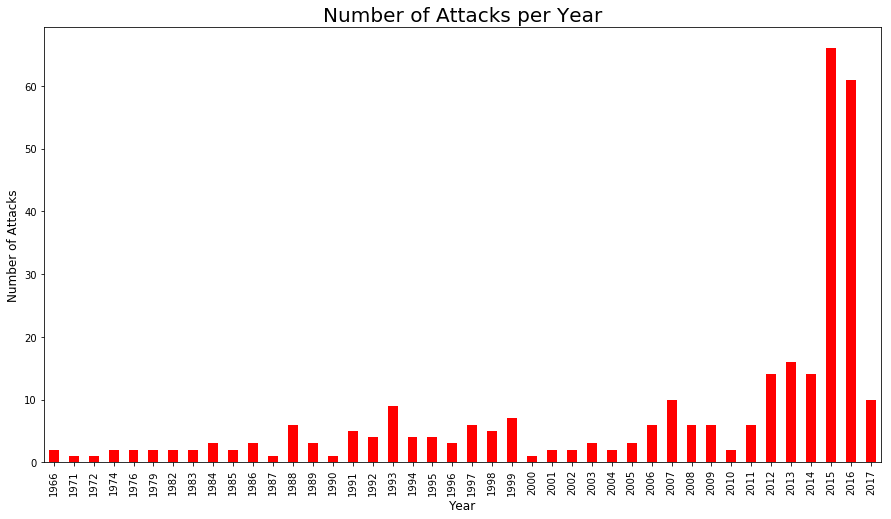

In [142]:
ms['Date'] = pd.to_datetime(ms['Date'])
ms['Year'] = ms['Date'].dt.year
ms = ms.sort_values('Year')
ms.set_index('Year', inplace=True)
ms.reset_index(level=0, inplace=True)
plt.figure(figsize=(15,8))
ms.Year.value_counts().sort_index().plot.bar(color='r')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of Attacks per Year', fontsize=20)
plt.show()

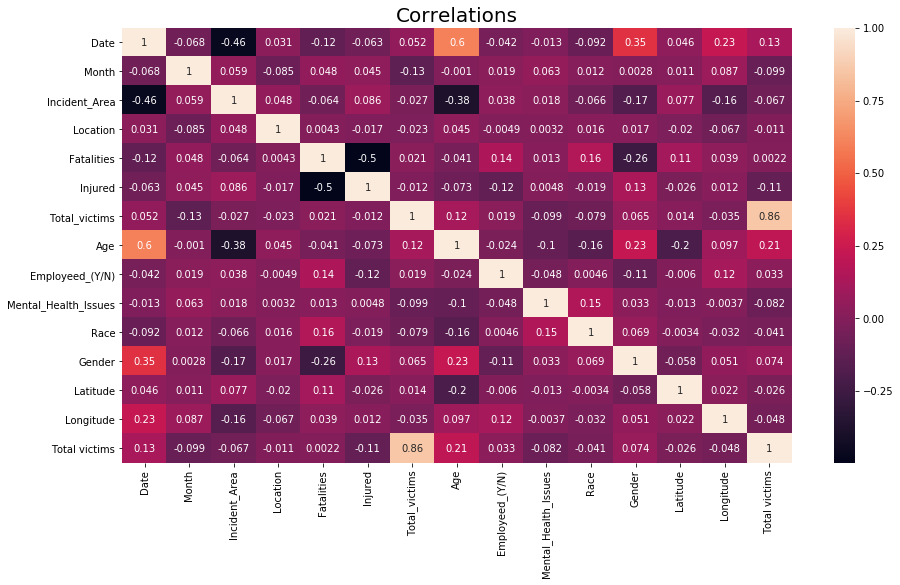

In [156]:
ms1 = ms.drop(['Cnt_Mth', 'Year','Title', 'Open/Close_Location', 'Target', 'Cause', 'Summary', 'Employed_at'], axis=1)
ms1.duplicated()
ms2 = ms1.drop_duplicates()
ms2['Total victims'] = ms2['Fatalities'] + ms['Injured']
ms2['Total victims'] = ms2['Total victims'].astype(int)
ms3 = ms2.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in ms3.columns:
    ms3[col] = labelencoder.fit_transform(ms3[col].astype(str))
plt.figure(figsize=(15,8))
sns.heatmap(ms3.corr(),annot=True)
plt.title('Correlations', fontsize = 20)
plt.show()

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
import us as us
%matplotlib inline

In [140]:
ms = pd.DataFrame(pd.read_csv('C:/Users/aweissma/Desktop/projects/Mass Shootings Dataset Ver 10.csv', encoding = 'latin-1'))

 ## Part I: What Is The Trend Of US Mass Shootings Over The Past 10 Years?
 1. What is the year with the highest number of incidents? Highest victim count as result of these public mass shootings?
 > It is evident there is a sharp increase in attacks and number of victims in 2015 and 2016. From 2006-2016 in the U.S., **there have been 207 mass shootings.** These incidents resulted in **1,643** victims shot: **801 people were shot and killed, and 842 people were shot and injured.**

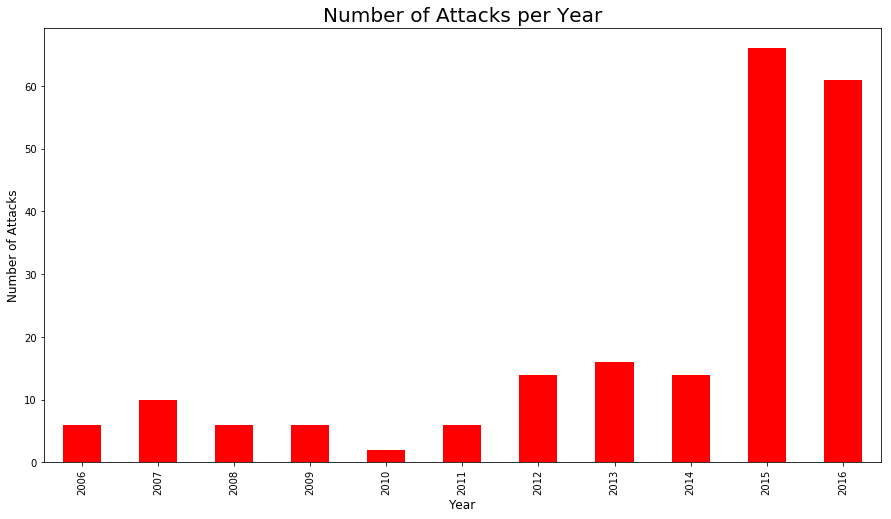

In [124]:
ms = pd.DataFrame(ms[(ms['Date'] >= '2006-01-01') & (ms['Date'] < '2017-01-01')])
ms['Date'] = pd.to_datetime(ms['Date'])
ms['Year'] = ms['Date'].dt.year
ms = ms.sort_values('Year')
ms.set_index('Year', inplace=True)
ms.reset_index(level=0, inplace=True)
plt.figure(figsize=(15,8))
ms.Year.value_counts().sort_index().plot.bar(color='r')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of Attacks per Year', fontsize=20)
plt.show()

In [136]:
ms.columns

Index(['Year', 'Date', 'Month', 'Cnt_Mth', 'Title', 'Incident_Area',
       'Location', 'Open/Close_Location', 'Target', 'Cause', 'Summary',
       'Fatalities', 'Injured', 'Total_victims', 'Age', 'Employeed_(Y/N)',
       'Employed_at', 'Mental_Health_Issues', 'Race', 'Gender', 'Latitude',
       'Longitude', 'DoW', 'city', 'state'],
      dtype='object')

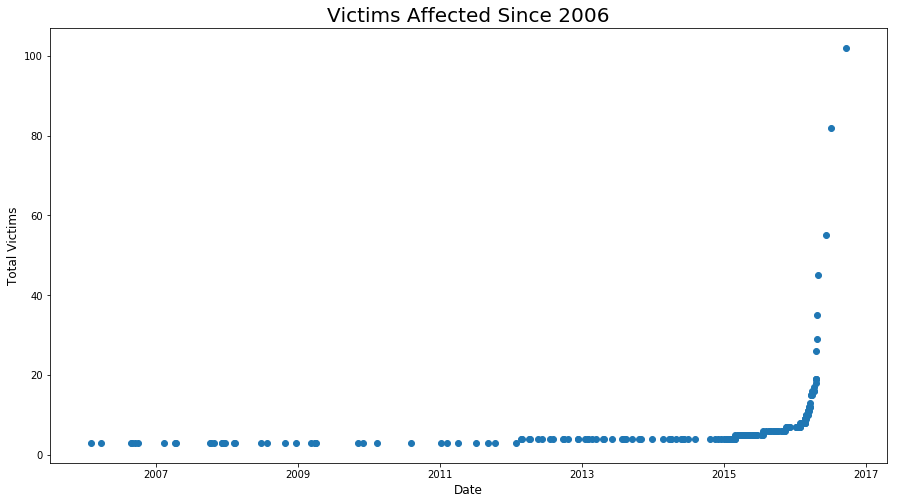

In [125]:
plt.figure(figsize=(15,8))
plt.scatter(np.sort(ms['Date']), np.sort(ms['Total_victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.title('Victims Affected Since 2006', fontsize=20)
plt.show()

In [126]:
ms['DoW'] = ms['Date'].dt.dayofweek

Text(0.5,1,'Fatalities vs Injuries per Year')

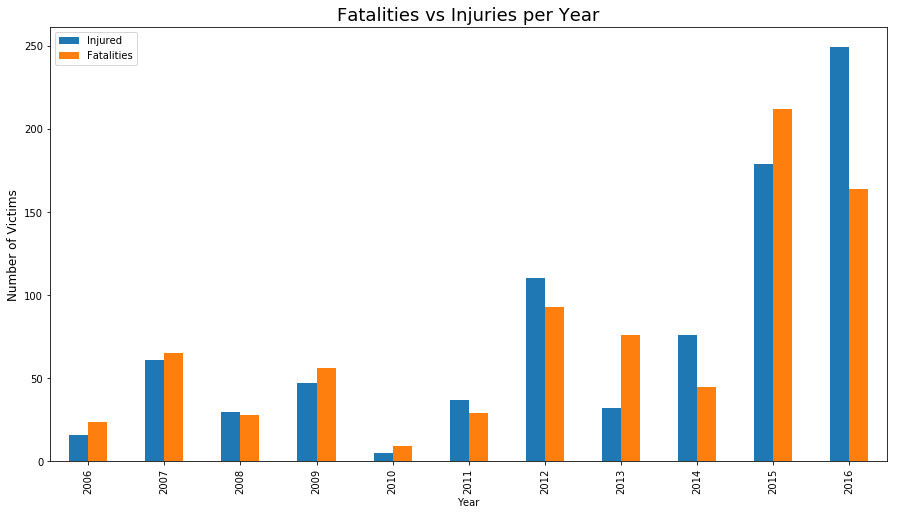

In [127]:
tot = ms[['Year', 'Injured', 'Fatalities']].groupby('Year').sum()

tot.plot.bar(figsize=(15,8))
plt.ylabel('Number of Victims', fontsize=12)
plt.title('Fatalities vs Injuries per Year', fontsize=18)

## Part II: Exploring Time of Year of Attacks.
1. Does time of year account for the frequency of mass shootings?
> February is the month with the most attacks both pre 2016 and in 2016. This should be further analyzed to see if we can draw any correlations.

February is the month with the most attacks both pre 2016 and in 2016. This should be further analyzed to see if we can draw any correlations.

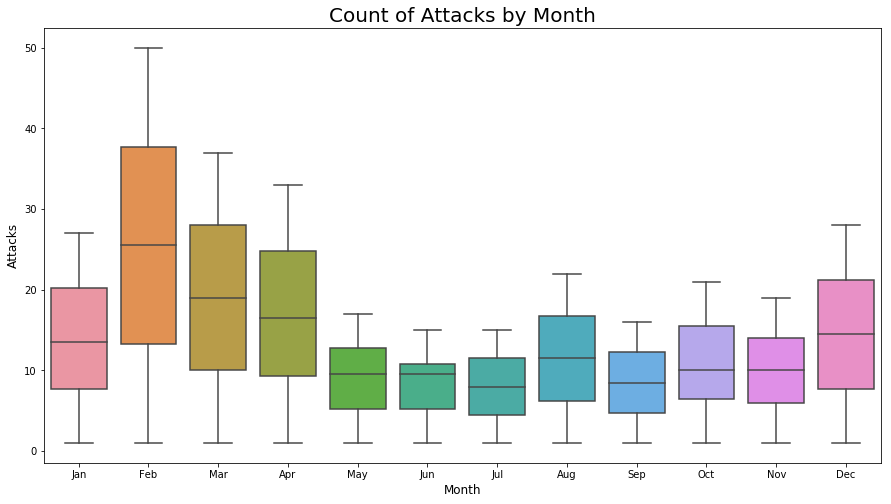

In [153]:
ms['Month'] = ms['Date'].dt.month
month = ms['Month'].value_counts()           # counts values according to specific year
plt.figure(figsize=(15,8))                                # decides size of plot
month = (month.sort_index())
month.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(15,8))
sns.boxplot(ms['Month'], ms['Cnt_Mth'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Attacks', fontsize=12)
plt.title('Count of Attacks by Month', fontsize=20)
tick_val = [0,1,2,3,4,5,6,7,8,9,10,11]
tick_lab = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(tick_val, tick_lab)
plt.show()

## Part III: Similiarities In Public Mass Shootings.
1. Are there trending characteristics in public shooting incidents when focusing on offenders, settings, general methods or typologies?
> California, Florida and Texas are the top three states where **shooting incidents are highest**. California, Florida and Texas are also the top 3 highest populated states in the United States. Let's look at the settings/areas they take place.

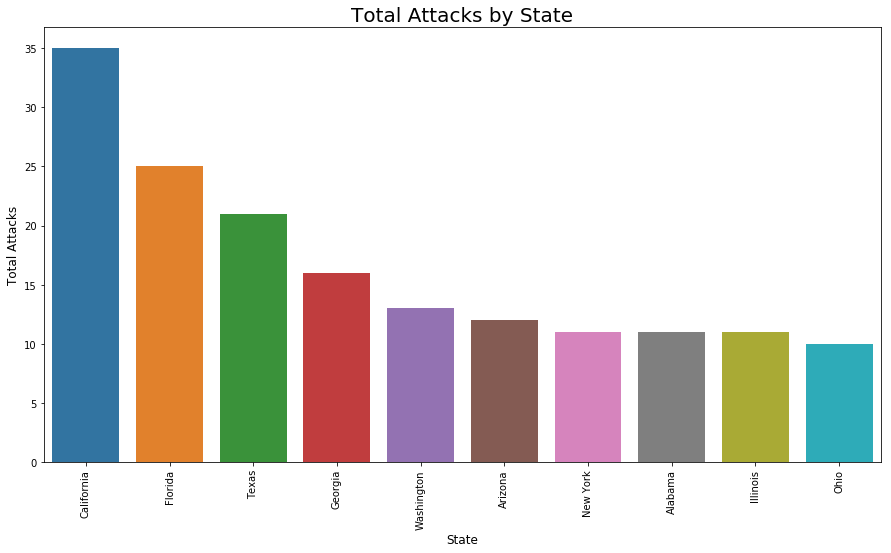

In [159]:
ms['city'] = ms.Location.str.split(',').str.get(0)
ms['state'] = ms.Location.str.split(',').str.get(1)
ms['state'] = ms['state'].replace({' Texas': 'Texas',' Arizona': 'Arizona',' Washington': 'Washington',' Louisiana': 'Louisiana',
                                   ' New York': 'New York', ' Illinois': 'Illinois',' California': 'California',
                                   ' South Carolina':  'South Carolina', ' Nevada': 'Nevado',' Florida': 'Florida',
                                   ' Georgia': 'Georgia',' Kansas': 'Kansas', ' Oklahoma': 'Oklahoma',' Montana': 'Montana',
                                   ' Kentucky': 'Kentucky', ' New Jersey': 'New Jersey',' Michigan': 'Michigan',' Iowa': 'Iowa',
                                   ' Massachusetts': 'Massachusetts',' North Carolina': 'North Carolina',' Utah': 'Utah',
                                   ' Colorado': 'Colorado',' Wyoming': 'Wyoming',' Ohio': 'Ohio',' Tennessee': 'Tennessee',
                                   ' Wisconsin': 'Wisconsin',' Alaska': 'Alaska',' Mississippi': 'Mississippi',
                                   ' Connecticut': 'Connecticut',' Pennsylvania': 'Pennsylvania',' Oregon': 'Oregon',
                                   ' Hawaii': 'Hawaii',' Virginia': 'Virginia', ' Minnesota': 'Minnesota',' Vermont': 'Vermont',
                                   ' Nebraska': 'Nebraska', ' Missouri': 'Missouri', ' Alabama': 'Alabama',' CA' : 'California',
                                   ' New Mexico': 'New Mexico', ' West Virginia': 'West Virginia',  ' Idaho': 'Idaho', 
                                   ' Indiana': 'Indiana',' South Dakota': 'South Dakota',' Maine': 'Maine', 
                                   '  Virginia': 'Virginia', ' Texas ': 'Texas' ,' Maryland': 'Maryland','Texas ': 'Texas',
                                   ' San Diego': 'California',' Lancaster': 'Pennsylvania',' Albuquerque': 'New Mexico',
                                   ' Souderton': 'Pennsylvania',' WA': 'Washington',' LA': 'Louisiana',' Delaware': 'Delaware',
                                   ' florida': 'Florida',' CO': 'Colorado',' MD': 'Maryland',' NV': 'Nevada',
                                  ' PA': 'Pennsylvania',' TX': 'Texas'})

countState = ms['state'].value_counts()
countState = countState.head(10)
plt.figure(figsize=(15,8))
sns.barplot(countState.index, countState.values)
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize = 12)
plt.ylabel('Total Attacks', fontsize = 12)
plt.title('Total Attacks by State', fontsize=20)
plt.show()

In [165]:
ms['Incident_Area']
cnt_area = ms['Incident_Area'].value_counts()
cnt_area = cnt_area.head(10)
cnt_area.groupby('Incident_Area').value_counts()

KeyError: 'Incident_Area'

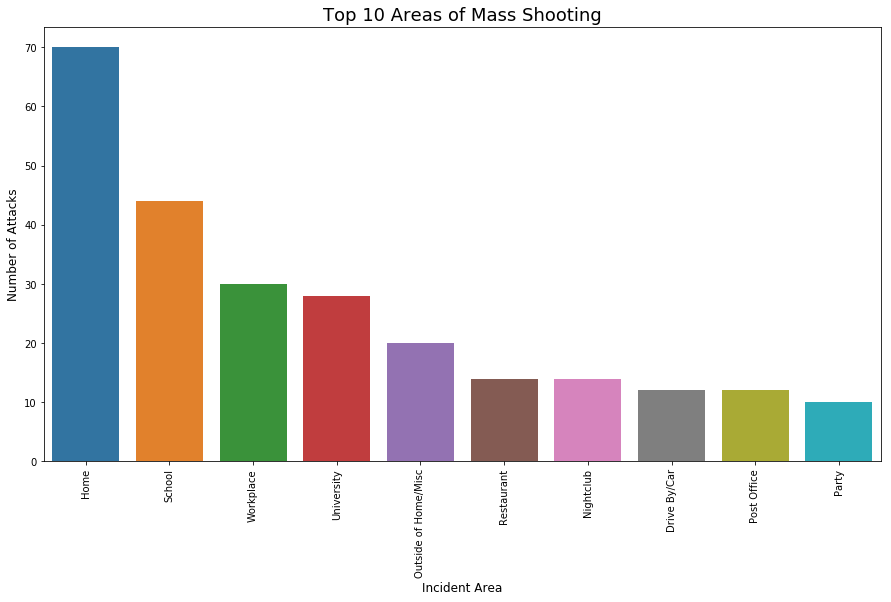

In [161]:
ms['Incident_Area']
cnt_area = ms['Incident_Area'].value_counts()
cnt_area = cnt_area.head(10)
plt.figure(figsize=(15,8))
sns.barplot(cnt_area.index, cnt_area.values)
plt.xticks(rotation='vertical')
plt.xlabel('Incident Area', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Areas of Mass Shooting', fontsize=18)
plt.show()


#sns.barplot(ms['Incident_Area'], ms['Injured'])

Majority of attacks happened inside of the home. Could this correlate with day of week?

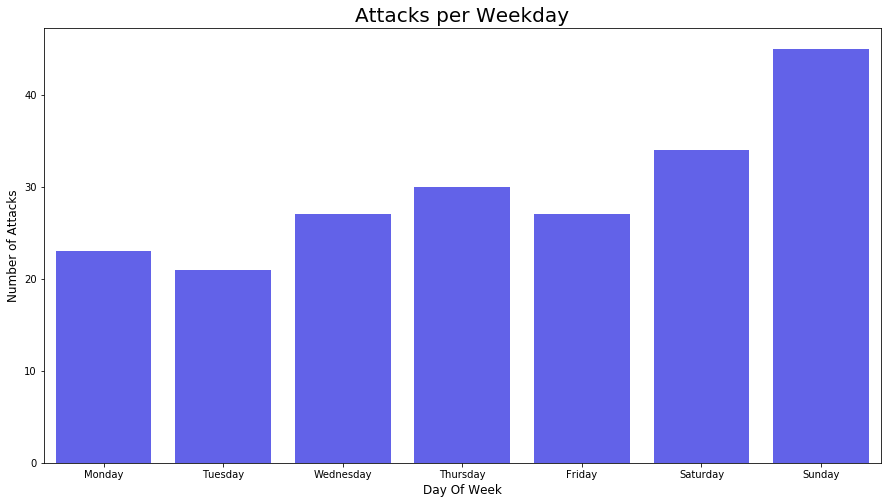

In [167]:
ms = pd.DataFrame(ms[(ms['Date'] >= '2006-01-01') & (ms['Date'] < '2017-01-01')])
ms['DoW'] = ms['Date'].dt.dayofweek
cntDay = ms['DoW'].value_counts()
plt.figure(figsize=(15,8))
cntDay = (cntDay.sort_index())
cntDay.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(cntDay.index, cntDay.values, alpha=0.7, color='blue')

plt.xlabel('Day Of Week', fontsize=12)  # fontsize and label
plt.ylabel('Number of Attacks', fontsize=12)  # fontsize and label
plt.title('Attacks per Weekday', fontsize=20) # fontsize and label
plt.show()

From 2006-2016, attacks had highest frequency on Sundays.

In [175]:
ms['weekdayflg'] =( ms['DoW'] // 5 != 1).astype(float)

cnt_srs = pd.DataFrame(ms['weekdayflg'].value_counts())
cnt_srs = (cnt_srs.set_index('DoW'))
plt.figure(figsize=(15,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Weekdays', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Average Attacks per Weekdays', fontsize=20)
plt.show()

# Do average

KeyError: 'DoW'

Number of attacks are ~3 times higher on weekdays compared to weekends. **Schools are in session on weekdays, so are incidents more likely to happen Schools?**

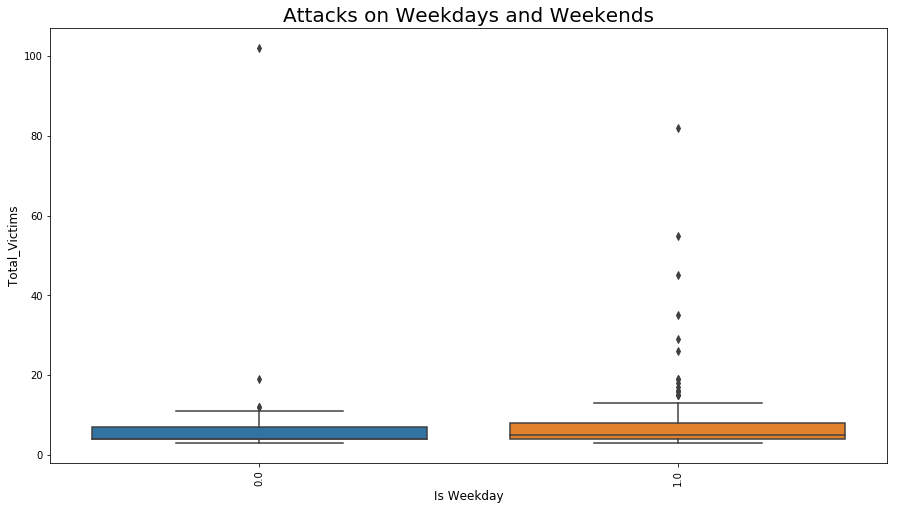

In [100]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weekdayflg", y="Total_victims", data=ms[ms['Total_victims'] < 500])
plt.ylabel('Total_Victims', fontsize=12)
plt.xlabel('Is Weekday', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Attacks on Weekdays and Weekends", fontsize=20)
plt.show()   

25% - 75% of victims lie between 4 and 14 on Weekdays and 4 and 9 on Weekends

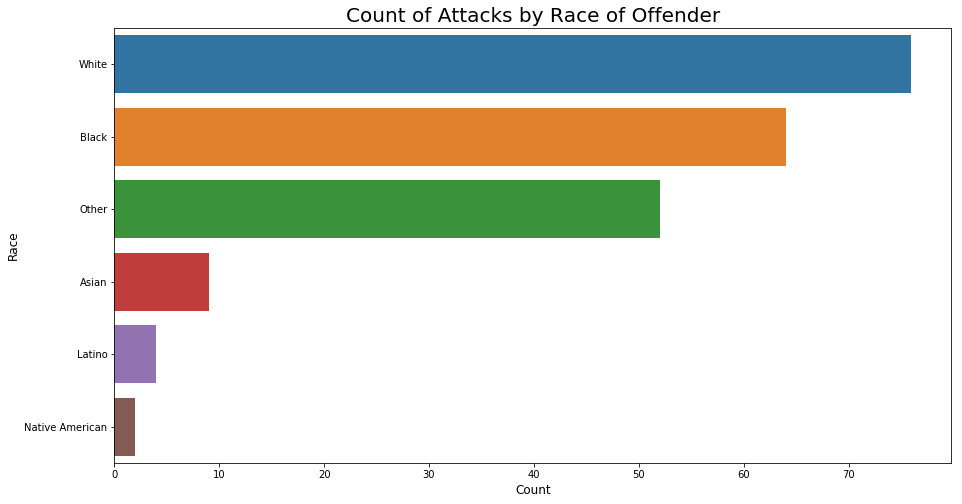

In [101]:
cntRace = ms['Race'].value_counts()

plt.figure(figsize=(15,8))
sns.barplot(cntRace.values, cntRace.index, orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Race', fontsize=12)
plt.title('Count of Attacks by Race of Offender', fontsize = 20)
plt.show()

Gross overall number of shooters are in the White race category.

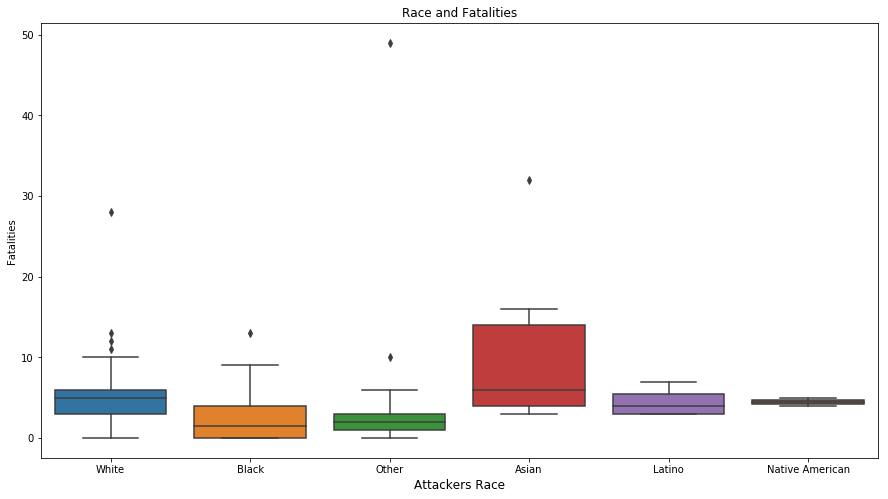

In [102]:
plt.figure(figsize=(15,8))
sns.boxplot(ms['Race'], ms['Fatalities'])
plt.xlabel('Attackers Race', fontsize=12)
plt.title('Race and Fatalities', fontsize=12)
plt.show()

When the gross shooting numbers by race are adjusted for demographics there is no apparent correlation with the race of the shooters.

In [103]:
gender = ms['Gender'].value_counts()
gender.sum()
male = ms[ms['Gender'] == 'Male']
male = male.Year.value_counts()
pct_Male = male.sum() / gender.sum()
print(pct_Male)
female = ms[ms['Gender'] == 'Female']
female = female.Year.value_counts()
pct_Female = female.sum() / gender.sum()
print(pct_Female)
mf = ms[ms['Gender'] == 'Male/Female']
mf = mf.Year.value_counts()
pct_mf = mf.sum() / gender.sum()
print(pct_mf)
unknown = ms[ms['Gender'] == 'Unknown']
unknown = unknown.Year.value_counts()
pct_unknown = unknown.sum() / gender.sum()
print(pct_unknown)

0.864734299517
0.0144927536232
0.0193236714976
0.101449275362


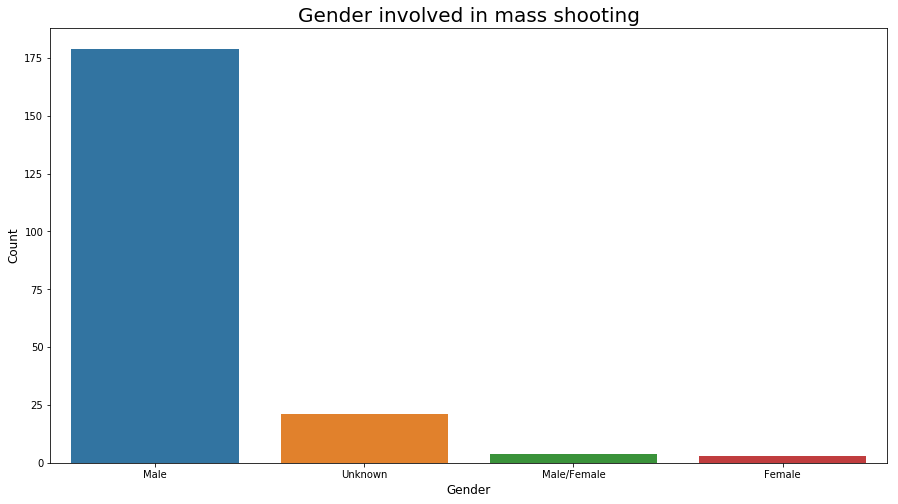

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(gender.index, gender.values)
plt.title('Gender involved in mass shooting', fontsize=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(gender.index)), gender.index)
plt.show()

The majority of shooters were male, committing 179 number of cases, i.e., **86.5% of the cases.** The remainder is: **Female: 1.4%, Male/Female: 1.9%, Unknown: 10.1%.**

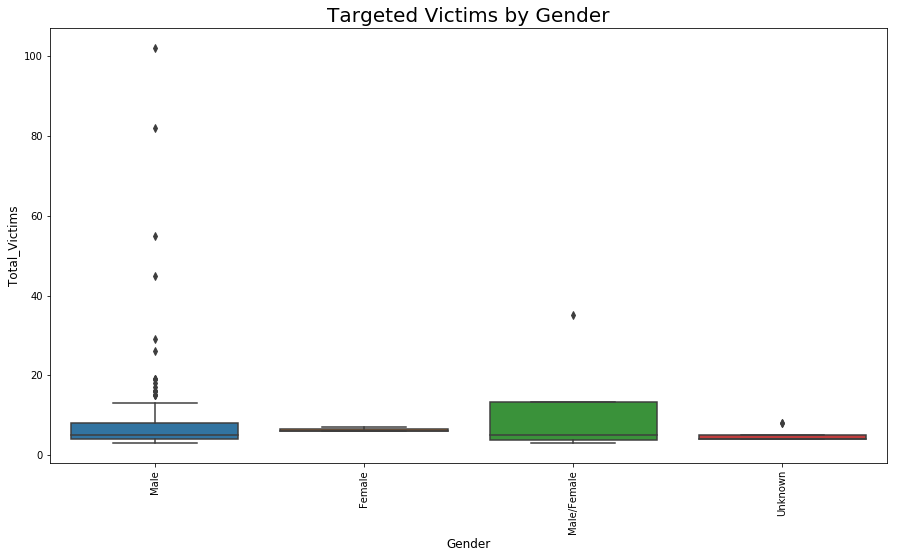

In [105]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Gender", y="Total_victims", data=ms)
plt.ylabel('Total_Victims', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Targeted Victims by Gender", fontsize=20)
plt.show()

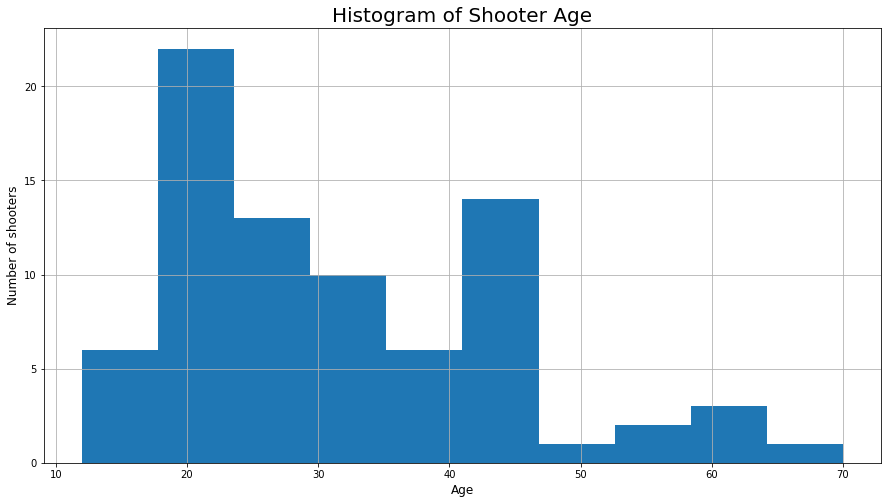

In [106]:
ratio = (15,8)
ages = ms.Age.values
sum = []
for i in ages:
    if type(i) == float:
        continue
    s = i.split(',')
    sum.append(s)
flattened = [int(val) for sublist in sum for val in sublist]

fig,ax = plt.subplots(figsize=ratio)
ax.hist(flattened,bins=10)
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines;
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines;
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of shooters', fontsize=12);
plt.title('Histogram of Shooter Age', fontsize=20);

The gunmen **younger than 50** accounted for the main proportion of shooters. what about mental health issues and age?

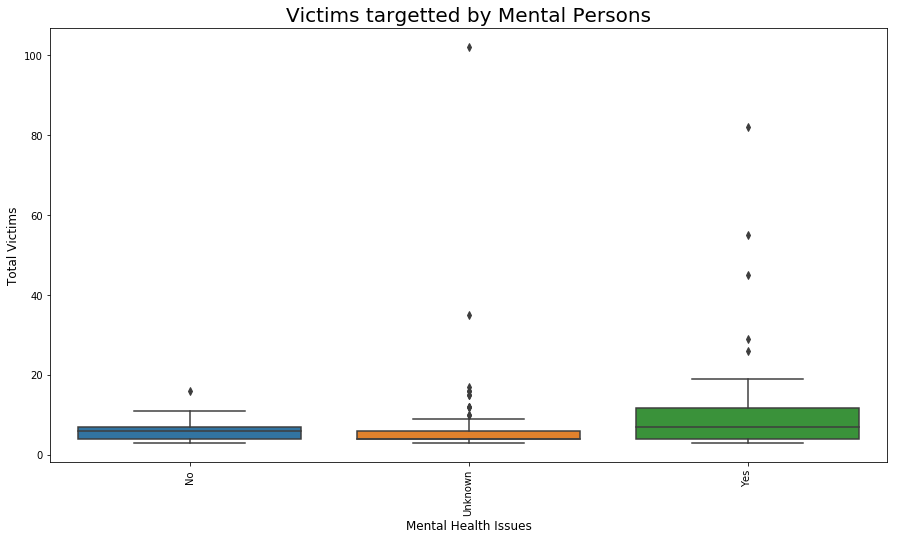

In [107]:
cnt_mental_health = ms['Mental_Health_Issues'].value_counts()
plt.figure(figsize=(15,8))
sns.boxplot(x="Mental_Health_Issues", y="Total_victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Mental Health Issues', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Mental Persons", fontsize=20)
plt.show()

The majority of victims were affected by shooters suffering from Mental Health Disorders.

# **Further Research: **
1. How do mass shootings in the US compare to other countries?
2. What other information can we look into to find out the reason behind spikes in February shootings in 2015 and 2016?
3. Can crime rates be significantly reduced by stricter regulation of firearms ownership and commerce?
4. Look into the correlations between groups?